# 谱聚类简介
谱聚类是从图论中演化出来的算法，后来在聚类中得到了广泛的应用。它的主要思想是把所有的数据看作空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，通过对所有数据点组成的图进行切图，让切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高，从而达到聚类的目的。

# 谱聚类原理
谱聚类算法是一个使用起来较为容易但是从原理上不是那么容易理解的算法。对于谱聚类算法我们可以归纳为以下的步骤：
输入：样本集D=(x1,x2,...,xn)，相似矩阵的生成方式, 降维后的维度k1, 聚类方法，聚类后的维度k2
输出： 簇划分C(c1,c2,...ck2).　
1) 根据输入的相似矩阵的生成方式构建样本的相似矩阵S
2）根据相似矩阵S构建邻接矩阵W，构建度矩阵D
3）计算出拉普拉斯矩阵L
4）构建标准化后的拉普拉斯矩阵D−1/2LD−1/2
5）计算D−1/2LD−1/2最小的k1个特征值所各自对应的特征向量f
6) 将各自对应的特征向量f组成的矩阵按行标准化，最终组成n×k1维的特征矩阵F
7）对F中的每一行作为一个k1维的样本，共n个样本，用输入的聚类方法进行聚类，聚类维数为k2。
8）得到簇划分C(c1,c2,...ck2).　
谱聚类算法的具体原理，需要一定图论相关的基础，就不在此展开了。详细解释可以参考斯坦佛大学CS224w课程第五课的内容，课程的课件可以参见【参考链接2】，也可以阅读【参考链接3】对课件内容进行理解。

# 谱聚类算法总结
## 谱聚类的主要优点
1. 谱聚类只需要数据之间的相似度矩阵，因此对于处理稀疏数据的聚类很有效。这点传统聚类算法比如K-Means很难做到
2. 由于使用了降维，因此在处理高维数据聚类时的复杂度比传统聚类算法好。

## 谱聚类的主要缺点
1.  如果最终聚类的维度非常高，则由于降维的幅度不够，谱聚类的运行速度和最后的聚类效果均不好。
2.  聚类效果依赖于相似矩阵，不同的相似矩阵得到的最终聚类效果可能很不同。

# 谱聚类在Sklearn中的实现
在sklearn中提供了谱聚类算法的实现：
```
sklearn.cluster.SpectralClustering(n_clusters=8, *, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False)
```
## 参数详解：
'n_clusters' 是投影子空间的维度，即聚类后的簇的数量也是原理中的k
'eigen_solver' 是所使用的特征值分解策略，可选参数有'arpack', 'lobpcg', 'amg'。AMG 需要安装 pyamg。它可以在非常大的稀疏问题上更快，但也可能导致不稳定性。如果没有，则也可以使用'arpack'
'random_state' 是一个伪随机数生成器，用于K-means中的特征向量分解。
'Gamma' 表示的 rbf, poly, sigmoid, laplacian and chi2 kernels的核系数
这里仅列举了一部分使用的参数，完整参数可参考官方文档即【参考链接4】也可以阅读【参考链接5】对参数的含义和原理进行理解。

# 谱聚类的应用
在这一部分中将使用sklearn中make_blobs来模拟生成一组数据并进行聚类分析。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_

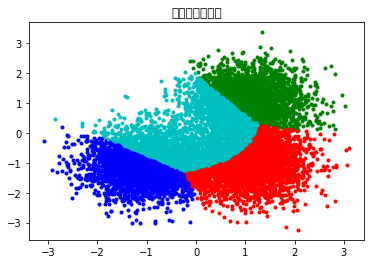

In [1]:
# 导入相关模块和导入数据集
import numpy as np
from sklearn.cluster import spectral_clustering
from sklearn.datasets import make_blobs
from sklearn import metrics
# 生成样本数据
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
#变换成矩阵，输入必须是对称矩阵
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()
#设置谱聚类函数
n_clusters_= 4
labels = spectral_clustering(metrics_metrix,n_clusters=n_clusters_)
import matplotlib.pyplot as plt
from itertools import cycle
# 设置输出中文
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] =False 
# 对算法聚类结果进行可视化
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    #根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    #X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
plt.title("谱聚类分类结果")
plt.show()


# 练习题
使用sklearn提供的谱聚类的API对鸢尾花数据集的数据进行预测，并尝试将预测的结果进行分析。鸢尾花的数据集使用方法如下:
```
from sklearn.datasets import load_iris
iris = load_iris()
```

# 参考链接
1.     https://zhuanlan.zhihu.com/p/76470230
2.     http://snap.stanford.edu/class/cs224w-2019/slides/05-spectral.pdf
3.     https://www.zhihu.com/topic/20055256/hot
4.     https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html?highlight=clustering#sklearn.cluster.SpectralClustering.fit
5.     https://blog.csdn.net/weixin_36474809/article/details/89927502